# Roadmap using the medial axis as sampling 

In [1]:
import numpy 
import matplotlib.pyplot as plt
from matplotlib import image

from sklearn.neighbors import KDTree
import networkx as nx
nx.__version__ # should be 2.1

from shapely.geometry import Polygon, Point, LineString, LinearRing, MultiPolygon

import numpy.linalg as LA
from queue import PriorityQueue

import csv

In [2]:
import DDAE_library as ddae

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 9, 9

In [14]:
sample=77
#outfile='C:\\Users\\Gabri\\Documents\\MotionPlanning_MachineLearning\\PathPlanning_x_2Dmaps\\metrics and results\\'

#Read map
img_map=image.imread('64x64_validation250_v2/map'+str(sample)+'.png');

#Read numpy tiny_map from unet results
skeleton_map=numpy.load('as_numpy_array/b1xp0_'+str(sample)+'_9000.npy', 
                             allow_pickle=True)
#Read polygon
all_polygons=numpy.load('polygons/polygon_m'+str(sample)+'.npy',
                            allow_pickle=True)

#Read numpy medial axis results
ma_points=numpy.load('numpy_MA_with_ShapelyGeometry/medial_axis_map'+str(sample)+'_smp.npy', 
                             allow_pickle=True)
ma_nodes = []
for e in ma_points:
    ma_nodes.append((e.x, e.y))



polygon_list=[]
for p in all_polygons:
    polygon_list.append(Polygon(p))

# Get vertices
vertex=ddae.get_vertices(skeleton_map)
nodes=ddae.sample_vertices(vertex,50) #the same samples found in Class_MedialAxis2D

g=ddae.graph(nodes,polygon_list)
g_ma=ddae.graph(ma_nodes,polygon_list)



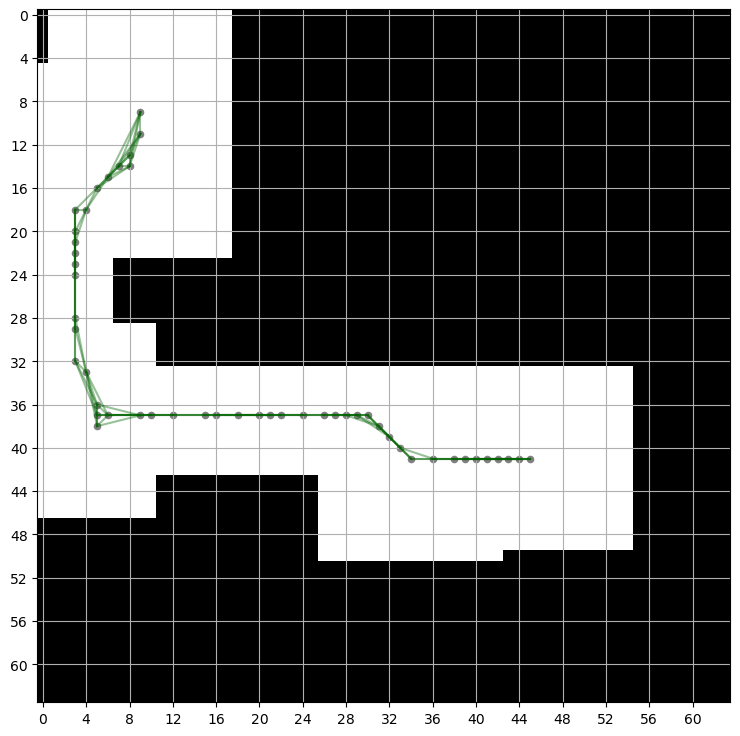

In [15]:
for (n1, n2) in g.edges:
    plt.plot([n1[0], n2[0]], [n1[1], n2[1]], 'darkgreen' , alpha=0.4, linewidth='1.5')

for i in nodes:
    plt.scatter(i[0],i[1], color='gray',alpha=1.0,s=20)

plt.imshow(img_map,cmap='binary')
k=12

plt.xticks(numpy.arange(0, 63, step=4))
plt.yticks(numpy.arange(0, 63, step=4))
plt.grid(True)

plt.show()